# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.




### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

**Introducción**

El presente proyecto, tiene por objetivo implementar un modelo que prediga el tráfico en la autopista Arturo Illia para el último trimestre del 2019.

La autopista Arturo Illia forma parte de un conjunto de autopistas situadas en la ciudad de Buenos Aires y explotadas por la empresa denominada AUSA S.A., cuyo accionista principal es el Gobierno de la Ciudad de Buenos Aires.

Las autopistas que opera dicha empresa son las siguientes:

Arturo Illia,

25 de Mayo; 

Dellepiane;

Perito Moreno;

Hector Cámpora;

9 de Julio Sur; 

Paseo del Bajo (PDB);

Avenida Lugones; 

Avenida Cantilo.

**Primera parte:** inicialmente trabajaré con datasets relativos a la autopista Illía, correspondientes a los años 2017, 2018 y 2019 y para pagos efectuados exclusivamente en efectivo. Esta etapa incluye: Exploración de Datos, implementación de Modelos de Machine Learning; comparación de resultados obtenidos e interpretación de los mismos. 

**Segunda parte:** sumo al análisis un dataset que contiene datos desde el año 2010 a 2019 inclusive. En esta sección, efectúo un nuevo preprocesamiento de datos con la finalidad de obtener una estructura homogénea de los mismos.
Esta etapa incluye: Exploración de Datos, implementación de Modelos de Machine Learning; comparación de resultados obtenidos e interpretación de los mismos. 

**Tercera Parte:** en la etapa de interpretación del proyecto y de implementaciones optativas, agrego un apartado sobre información de obras de gran magnitud realizadas por la empresa, cómo así también un resumen  comparativo de los datos obtenidos de todas las autopistas de la empresa AUSA. 
Esa información, explica y permite entender los cambios en el volumen del flujo vehícular de la autopista Arturo Illia. 


### Primera Parte

Se importan las librerías a utilizar en el proyecto.

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline 

#### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.



In [156]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [157]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [158]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [159]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [160]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [161]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [162]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [163]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

**Inicio en trabajo con la estación Illia y la forma de pago Efectivo**


In [164]:
#Uno los 3 datasets.
data1 = pd.concat([data_2019, data_2018, data_2017])

#Me quedo solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(data1.estacion=='Illia', data1.forma_pago == 'EFECTIVO')
data1 = data1[mask]

#Elimino las columnas que no voy a utilizar
data1.drop(columns = ['periodo','hora_inicio','estacion'], inplace = True)

data1.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,EFECTIVO,537
86,2019-01-01,2,Martes,Centro,Pesado,EFECTIVO,1
88,2019-01-01,2,Martes,Provincia,Liviano,EFECTIVO,443
94,2019-01-01,2,Martes,Provincia,Pesado,EFECTIVO,1
149,2019-01-01,3,Martes,Centro,Liviano,EFECTIVO,769


In [165]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238869 entries, 80 to 1372326
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fecha           238869 non-null  object
 1   hora_fin        238869 non-null  int64 
 2   dia             238869 non-null  object
 3   sentido         238869 non-null  object
 4   tipo_vehiculo   238869 non-null  object
 5   forma_pago      238869 non-null  object
 6   cantidad_pasos  238869 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 14.6+ MB


In [166]:
data1.shape

(238869, 7)

In [167]:
data1.describe()

,hora_fin,cantidad_pasos
count,238869.000000,238869.000000
mean,11.874659,200.384232
std,6.739129,403.246904
min,0.000000,1.000000
25%,6.000000,2.000000
50%,12.000000,11.000000
75%,18.000000,104.000000
max,23.000000,2416.000000


**Exporto en formato 'csv' el data frame para usarlo posteriormente**

In [168]:
data1.to_csv('Data2.csv')

**Transformo la columna fecha a formato datetime y agrego hora_fin como hora.**

In [169]:
data1['fecha2'] = pd.to_datetime(data1.fecha) + pd.to_timedelta(data1.hora_fin, unit = 'h')

#Quito las columnas fecha y hora_fin ya que las incluí en el campo fecha2
data1.drop(columns=['fecha','hora_fin'], inplace = True)

data1.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,EFECTIVO,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,EFECTIVO,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,EFECTIVO,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,EFECTIVO,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,EFECTIVO,769,2019-01-01 03:00:00


In [170]:
#Corrijo el nombre de fecha2 a fecha
data1.rename(columns = {'fecha2':'fecha'}, inplace = True) 

In [171]:
#Reordeno el dataset por fecha e imprimo las primeras instancias
data1.sort_values('fecha', inplace = True)
data1.reset_index(drop=True, inplace = True)
data1.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,EFECTIVO,1,2017-01-01
1,Domingo,Provincia,Liviano,EFECTIVO,9,2017-01-01
2,Domingo,Provincia,Liviano,EFECTIVO,644,2017-01-01
3,Domingo,Provincia,Pesado,EFECTIVO,6,2017-01-01
4,Domingo,Provincia,Pesado,EFECTIVO,1,2017-01-01


**Grafíco paso vehicular por horas**

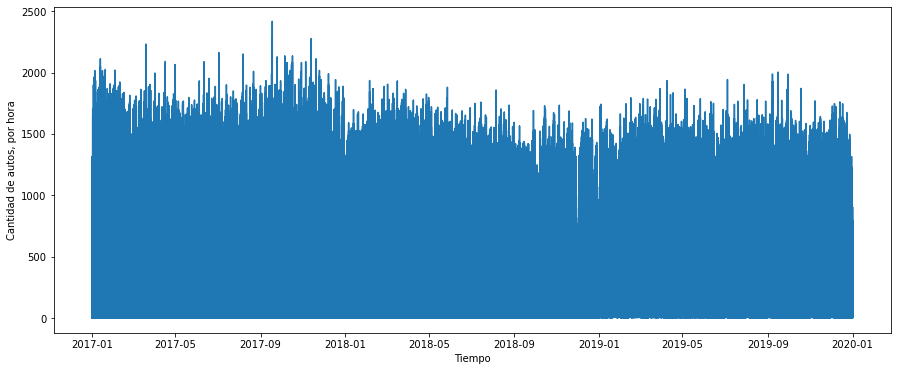

In [172]:
plt.figure(figsize = (15,6))
plt.plot(data1.fecha, data1.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

**Resampleo a días.**

In [173]:
diario = data1.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


**Grafíco el paso vehicular por día**

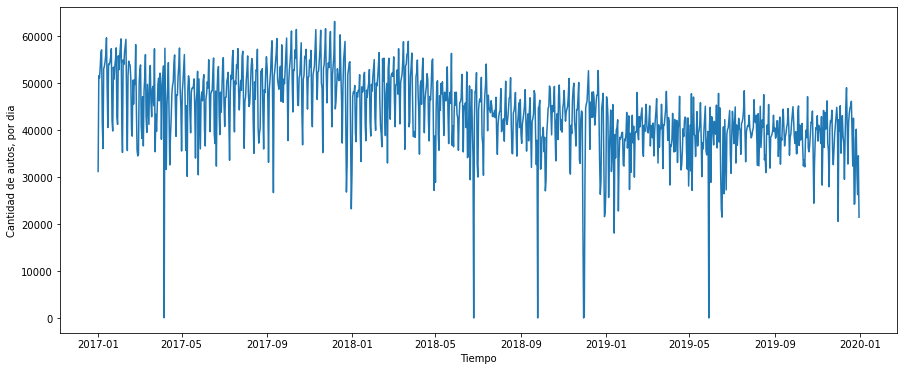

In [174]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [175]:
data1.describe()

,cantidad_pasos
count,238869.000000
mean,200.384232
std,403.246904
min,1.000000
25%,2.000000
50%,11.000000
75%,104.000000
max,2416.000000


**Con los primeros datos estadísticos compruebo la existencia de Outliers. Para obtener una impresión visual, grafíco con boxplot.**

In [176]:
data11 = pd.read_csv('Data2.csv')
data11.drop(columns = ['Unnamed: 0'], inplace = True)
data11.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019-01-01,2,Martes,Centro,Liviano,EFECTIVO,537
1,2019-01-01,2,Martes,Centro,Pesado,EFECTIVO,1
2,2019-01-01,2,Martes,Provincia,Liviano,EFECTIVO,443
3,2019-01-01,2,Martes,Provincia,Pesado,EFECTIVO,1
4,2019-01-01,3,Martes,Centro,Liviano,EFECTIVO,769


Text(0, 0.5, 'cantidad_pasos')

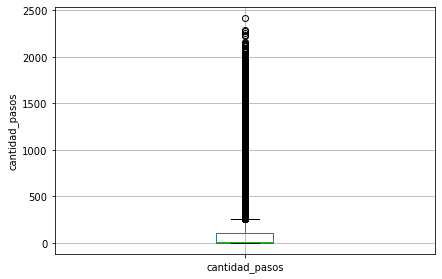

In [177]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
fig = data11.boxplot(column='cantidad_pasos')
fig.set_title('')
fig.set_ylabel('cantidad_pasos')

**Tratamiento de Outliers**

**Elijo remover datos atípicos con IQR.**

In [178]:
Q1 = data11.quantile(0.25)
Q3 = data11.quantile(0.75)
IQR = Q3 - Q1
dfout=data11[~((data11< (Q1 - 1.5 * IQR)) |(data11 > (Q3 + 1.5 * IQR))).any(axis=1)]
dfout.shape

(192654, 7)

In [179]:
dfout=data11[~((data11< (Q1 - 1.5 * IQR)) |(data11 > (Q3 + 1.5 * IQR))).any(axis=1)]
dfout.shape

(192654, 7)

**Aplicado IQR, nuevamente grafíco mediante boxplot para obtener una impresión visual del resultado de eliminación de datos atípicos.**

Text(0, 0.5, 'cantidad_pasos')

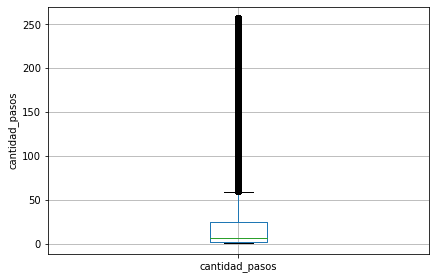

In [180]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = dfout.boxplot(column='cantidad_pasos')
fig.set_title('')
fig.set_ylabel('cantidad_pasos')

**Cómo eliminé instancias reseteo el index de mi dataset**

In [181]:
dfout = dfout.reset_index(drop=True)

**Efectuados los procedimientos iniciales, obtengo un dataset con valores estadísticos más equilibrados.**

In [182]:
dfout.describe()

,hora_fin,cantidad_pasos
count,192654.000000,192654.000000
mean,11.631910,24.982897
std,6.774533,45.721735
min,0.000000,1.000000
25%,6.000000,2.000000
50%,12.000000,6.000000
75%,17.000000,25.000000
max,23.000000,257.000000


**Verifico la existencia de valores faltantes**

In [183]:
print(dfout.isnull().sum())

fecha             0
hora_fin          0
dia               0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64


In [184]:
dfout.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019-01-01,2,Martes,Centro,Pesado,EFECTIVO,1
1,2019-01-01,2,Martes,Provincia,Pesado,EFECTIVO,1
2,2019-01-01,3,Martes,Centro,Pesado,EFECTIVO,7
3,2019-01-01,3,Martes,Provincia,Pesado,EFECTIVO,7
4,2019-01-01,5,Martes,Centro,Pesado,EFECTIVO,1


#### Transformo la columna fecha a formato datetime y agrego hora_fin como hora. 

In [185]:
df=dfout
df['fecha2'] = pd.to_datetime(df.fecha) + pd.to_timedelta(df.hora_fin, unit = 'h')

#Quito las columnas fecha y hora_fin ya que las incluí en el campo fecha2
df.drop(columns=['fecha','hora_fin'], inplace = True)

df.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
0,Martes,Centro,Pesado,EFECTIVO,1,2019-01-01 02:00:00
1,Martes,Provincia,Pesado,EFECTIVO,1,2019-01-01 02:00:00
2,Martes,Centro,Pesado,EFECTIVO,7,2019-01-01 03:00:00
3,Martes,Provincia,Pesado,EFECTIVO,7,2019-01-01 03:00:00
4,Martes,Centro,Pesado,EFECTIVO,1,2019-01-01 05:00:00


In [186]:
#Corrijo el nombre de fecha2 a fecha
df.rename(columns = {'fecha2':'fecha'}, inplace = True) 
df.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Martes,Centro,Pesado,EFECTIVO,1,2019-01-01 02:00:00
1,Martes,Provincia,Pesado,EFECTIVO,1,2019-01-01 02:00:00
2,Martes,Centro,Pesado,EFECTIVO,7,2019-01-01 03:00:00
3,Martes,Provincia,Pesado,EFECTIVO,7,2019-01-01 03:00:00
4,Martes,Centro,Pesado,EFECTIVO,1,2019-01-01 05:00:00


In [187]:
#Reordeno el dataset por fecha e imprimo las primeras instancias
df.sort_values('fecha', inplace = True)
df.reset_index(drop=True, inplace = True)
df.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Domingo,Centro,Pesado,EFECTIVO,21,2017-01-01
1,Domingo,Centro,Liviano,EFECTIVO,23,2017-01-01
2,Domingo,Centro,Pesado,EFECTIVO,1,2017-01-01
3,Domingo,Centro,Pesado,EFECTIVO,10,2017-01-01
4,Domingo,Provincia,Liviano,EFECTIVO,9,2017-01-01


In [188]:
df.shape

(192654, 6)

#### Encoding

Transformo variables categóricas de 'dia' y 'tipo_vehiculo' a númericas, con el fin de incluirlas en mi análisis.

In [189]:
from sklearn.preprocessing import OneHotEncoder

In [190]:
dia_get=pd.get_dummies(df['dia'])

In [191]:
vehiculo_get=pd.get_dummies(df['tipo_vehiculo'])

In [192]:
sentido_get=pd.get_dummies(df['sentido'])

In [193]:
forma_pago_get=pd.get_dummies(df['forma_pago'])

**Defino un nuevo dataset, con las variables encodeadas.**

In [194]:
data=pd.concat([df, dia_get,vehiculo_get, sentido_get,forma_pago_get], axis=1)

**Elimino las columnas categóricas encodeadas.**

In [195]:
columnas_descartables = ['dia','tipo_vehiculo','sentido','forma_pago']

In [196]:
data = data.drop(columns=columnas_descartables)

**Reseteo el index del dataset.**

In [197]:
data.reset_index(drop=True, inplace = True)

#### Imprimo las primeras instancias del nuevo dataset.

In [198]:
data.head()

,cantidad_pasos,fecha,Domingo,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes,Liviano,Pesado,Centro,Provincia,EFECTIVO
0,21,2017-01-01,1,0,0,0,0,0,0,0,1,1,0,1
1,23,2017-01-01,1,0,0,0,0,0,0,1,0,1,0,1
2,1,2017-01-01,1,0,0,0,0,0,0,0,1,1,0,1
3,10,2017-01-01,1,0,0,0,0,0,0,0,1,1,0,1
4,9,2017-01-01,1,0,0,0,0,0,0,1,0,0,1,1


#### Resampleo a Días para visualizar mejor los datos. 

In [199]:
diario = data.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 13)


,cantidad_pasos,Domingo,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes,Liviano,Pesado,Centro,Provincia,EFECTIVO
fecha,,,,,,,,,,,,,
2017-01-01,2925,192.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,137.0,106.0,86.0,192.0
2017-01-02,7819,0.0,0.0,273.0,0.0,0.0,0.0,0.0,54.0,219.0,165.0,108.0,273.0
2017-01-03,7151,0.0,0.0,0.0,267.0,0.0,0.0,0.0,56.0,211.0,159.0,108.0,267.0
2017-01-04,8303,0.0,0.0,0.0,0.0,280.0,0.0,0.0,55.0,225.0,170.0,110.0,280.0
2017-01-05,8314,0.0,275.0,0.0,0.0,0.0,0.0,0.0,53.0,222.0,171.0,104.0,275.0


#### Grafíco Cantidad de Paso Vehícular por Día. 

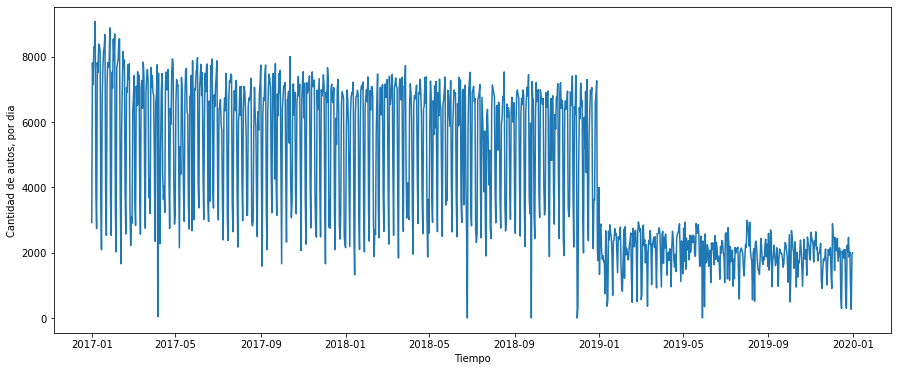

In [200]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

### Nuevas incógnitas.

Al resamplear a días y obtener el gráfico anteriór, resulta evidente la caida de flujo de tráfico en la autopista Illía, a partír del año 2019.

Por todo esto me surgieron los siguientes interrogantes:

*¿Cúal fue el motivo para esta significativa reducción de flujo vehicular, en una arteria de suma importancia de la ciudad de Buenos Aires, cómo es la Autopista Illía?

*¿Por qué medios se absorbió el flujo vehicular que disminuyó en la misma?,¿Se desvió dicho flujo hacia otra autopista? 

*¿La disminución de tránsito fue homogénea tanto para vehículos livianos, cómo pesados?

**Por este motivo decidí incorporar en mi análisis, otras features: forma de pago, días; sentido y tránsito por tipo de vehículo sea este liviano o pesado**

**Resultados del análisis de esos datos:**

**Variables Forma de Pago:** se incorporan nuevas formas de pago pero no se evidencia una nueva forma de pago que reemplace a otra de forma exponencial.

**Días:** en todas las autopistas se verifica un mayor flujo vehícular de lunes a viernes. El descenso del flujo en fines de semana, tampoco es tan significativo.

**Sentido:** el flujo de tránsito considerando el "sentido" es homogeneo en la serie de tiempo. No hay cambios significativos.

**Tipo de vehículo:** en la mayoría de las autopistas, se evidencia una marcada disminución en el volumen de tránsito vehicular desde el año 2019 y en paralelo una disminución más acentuada del transito de vehículos pesados. 

**Análisis por tránsito liviano - pesado.**

In [201]:
sint=pd.read_excel('autopistas_res.xlsx')

In [202]:
sint.shape

(3, 25)

In [203]:
sint.head()

,Año,Au1,ve_pes,ve_liv,Au2,ve_pes.1,ve_liv.1,Au3,ve_pes.2,ve_liv.2,...,ve_liv.4,Au6,ve_pes.5,ve_liv.5,Au7,ve_pes.6,ve_liv.6,Au8,ve_pes.7,ve_liv.7
0,2017,Illia,161166,130734,Avellaneda,244316,147526,Dellepiane,221817,135307,...,104757,Sarmiento,5196,19035,Salguero,5409,17972,Paseo del Bajo (PDB),0,0
1,2018,Illia,163619,135900,Avellaneda,238936,155435,Dellepiane,211892,141549,...,105900,Sarmiento,5976,21537,Salguero,8660,19398,Paseo del Bajo (PDB),0,0
2,2019,Illia,60272,100861,Avellaneda,82819,103624,Dellepiane,84438,103162,...,85453,Sarmiento,7602,17288,Salguero,8119,16750,Paseo del Bajo (PDB),20512,20452


**Gráficos por Autopista y Volumen de Flujo Vehícular por tipo de Vehículo (Tránsito Pesado o Liviano)**

**Autopista Arturo Illía**

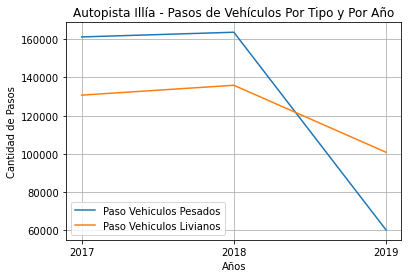

In [204]:
x = ('2017','2018','2019')
y1 = sint['ve_pes']
y2 = sint['ve_liv']
plt.plot(x, y1, label = 'Paso Vehiculos Pesados')
plt.plot(x, y2, label = 'Paso Vehiculos Livianos')
plt.xlabel('Años')
plt.ylabel('Cantidad de Pasos')
plt.title('Autopista Illía - Pasos de Vehículos Por Tipo y Por Año')
plt.grid()
plt.legend() 
plt.show()

**Autopista Avellaneda**

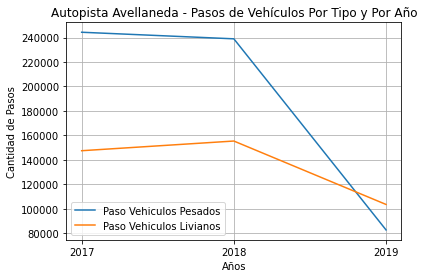

In [205]:
x = ('2017','2018','2019')
y1 = sint['ve_pes.1']
y2 = sint['ve_liv.1']
plt.plot(x, y1, label = 'Paso Vehiculos Pesados')
plt.plot(x, y2, label = 'Paso Vehiculos Livianos')
plt.xlabel('Años')
plt.ylabel('Cantidad de Pasos')
plt.title('Autopista Avellaneda - Pasos de Vehículos Por Tipo y Por Año')
plt.grid()
plt.legend() 
plt.show()
             

**Autopista Dellepiane**

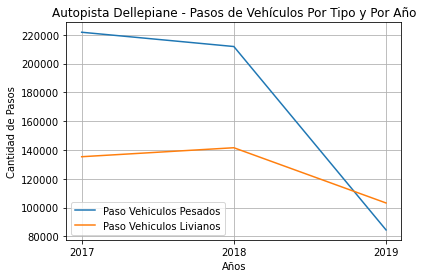

In [206]:
x = ('2017','2018','2019')
y1 = sint['ve_pes.2']
y2 = sint['ve_liv.2']
plt.plot(x, y1, label = 'Paso Vehiculos Pesados')
plt.plot(x, y2, label = 'Paso Vehiculos Livianos')
plt.xlabel('Años')
plt.ylabel('Cantidad de Pasos')
plt.title('Autopista Dellepiane - Pasos de Vehículos Por Tipo y Por Año')
plt.grid()
plt.legend() 
plt.show()

**Autopista Retiro.**

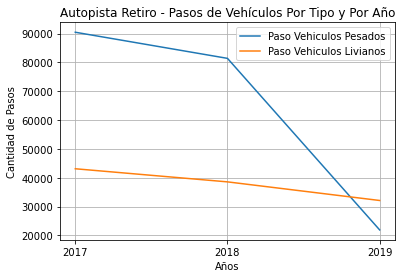

In [207]:
x = ('2017','2018','2019')
y1 = sint['ve_pes.3']
y2 = sint['ve_liv.3']
plt.plot(x, y1, label = 'Paso Vehiculos Pesados')
plt.plot(x, y2, label = 'Paso Vehiculos Livianos')
plt.xlabel('Años')
plt.ylabel('Cantidad de Pasos')
plt.title('Autopista Retiro - Pasos de Vehículos Por Tipo y Por Año')
plt.grid()
plt.legend() 
plt.show()

**Autopista Alberti.**

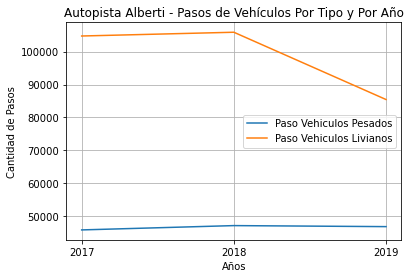

In [208]:
x = ('2017','2018','2019')
y1 = sint['ve_pes.4']
y2 = sint['ve_liv.4']
plt.plot(x, y1, label = 'Paso Vehiculos Pesados')
plt.plot(x, y2, label = 'Paso Vehiculos Livianos')
plt.xlabel('Años')
plt.ylabel('Cantidad de Pasos')
plt.title('Autopista Alberti - Pasos de Vehículos Por Tipo y Por Año')
plt.grid()
plt.legend() 
plt.show()

Cómo se puede apreciar en los gráficos, desde el año 2019 se evidencia una caída en el flujo vehiculár en todas estas autopistas. Y en paralelo una disminución marcada del tránsito pesado.

**Respuestas a las nuevas incógnitas.**

Del procesamiento de datos efectuado se sostiene lo siguiente:

*¿Cúal fue el motivo para esta significativa reducción de flujo vehicular, en una arteria de suma importancia de la ciudad de Buenos Aires, cómo es la Autopista Illía?*

Respuesta: AUSA S.A. emprendió desde el año 2016 un plan de grandes obras, de profundo impacto en la dinámica del tránsito de CABA. La disminución general del tránsito y en particular la acentuada reducción del tránsito pesado obedecería a este plan de obras. Una obra emblemática es la nueva autopista Paseo del Bajo (PDB), la que ha sido incluida en el dataset del año 2019.


*¿Por qué medios se absorbió el flujo vehicular que disminuyó en la misma?,¿Se desvió dicho flujo hacia otra autopista?*

El análisis del datasets, no permite responder con datos a ésta incógnita, dado que de las autopistas relevadas(de las que se conocen datos), ninguna en particular, o todas en conjunto han absorvido la disminución del tránsito, sea pesado o liviano. 
Los datos disponibles de la nueva autopista del Paseo del Bajo (PDB), representa una tránsito de  40964 vehículos.

*¿La disminución de tránsito fue homogénea tanto para vehículos livianos, cómo pesados?*

La disminución del tránsito no ha sido homogenea ya sea que se trate de vehículos livianos o vehículos pesados.

**Disminución de tránsito general para el conjunto de autopistas.Promedio años 2017-2018 vs 2019**

Disminución en Porcentaje de Tránsito Liviano:24%.

Disminución en Porcentaje de Tránsito Pesado:53%.

**Disminución de tránsito general para la autopista Arturo Illía.Promedio años 2017-2018 vs 2019**

Disminución en Porcentaje de Tránsito Liviano:24%.

Disminución en Porcentaje de Tránsito Pesado:63%.

**Con las Respuestas obtenidas surgen nuevas hipótesis:**

*¿El flujo vehícular fue absorvido por alguna/s autopista/s no contemplada/s en este Dataset?*

*¿El dataset está incompleto o sesgado?*


### Retomo el estudio de la Autopista Illía y forma de pago Efectivo.

#### Componentes de la serie.

Implemento Ventanas Móviles (rolling windows)


In [209]:
ventana = int(365*2/7)
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia

fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

#### Grafíco Cantidad Promedio de Pasos y Pasos Promedio Mediante Ventanas Móviles. 

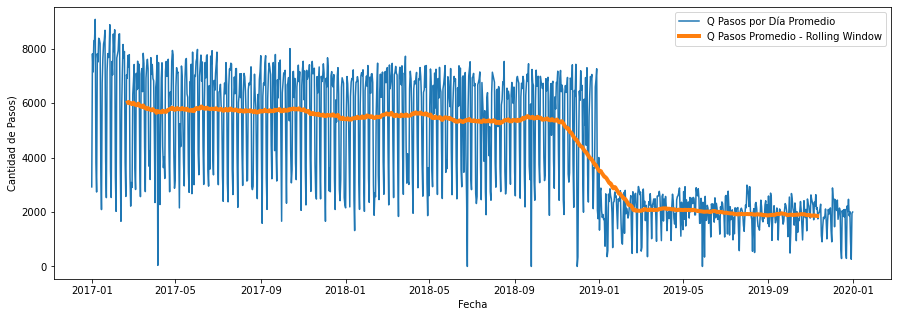

In [210]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Q Pasos por Día Promedio')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Q Pasos Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos)')
plt.legend()
plt.show()

**Realizo una Tendencia Lineal - LinearRegression**

In [211]:
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)
diario.head()

,cantidad_pasos,Domingo,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes,Liviano,Pesado,Centro,Provincia,EFECTIVO,fecha_numeros
fecha,,,,,,,,,,,,,,
2017-01-01,2925,192.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,137.0,106.0,86.0,192.0,736330
2017-01-02,7819,0.0,0.0,273.0,0.0,0.0,0.0,0.0,54.0,219.0,165.0,108.0,273.0,736331
2017-01-03,7151,0.0,0.0,0.0,267.0,0.0,0.0,0.0,56.0,211.0,159.0,108.0,267.0,736332
2017-01-04,8303,0.0,0.0,0.0,0.0,280.0,0.0,0.0,55.0,225.0,170.0,110.0,280.0,736333
2017-01-05,8314,0.0,275.0,0.0,0.0,0.0,0.0,0.0,53.0,222.0,171.0,104.0,275.0,736334


In [212]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)

LinearRegression()

#### Grafíco Pasos Promedio Diario, Pasos Diarios Promedios por Ventanas Móviles y Pasos Diarios Promedios por Ajuste Lineal.

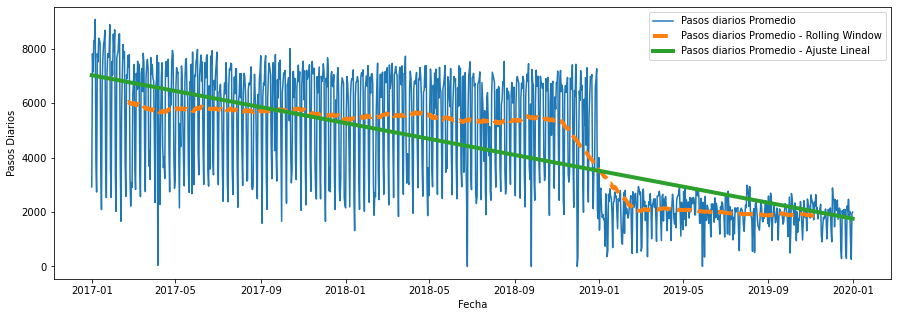

In [213]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Pasos diarios Promedio')
plt.plot(diario_promedio_tendencia, ls = '--', lw = 4, label = 'Pasos diarios Promedio - Rolling Window')
plt.plot(diario.index, lr.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Pasos diarios Promedio - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Pasos Diarios')
plt.legend()
plt.show()

**Se comprueba la tendencia a la disminución del flujo vehícular con el paso del tiempo.**

#### Gráficos desagregados de Pasos Vehículares según Serie Original, Ventanas Móviles y la Diferencia entre ambas.

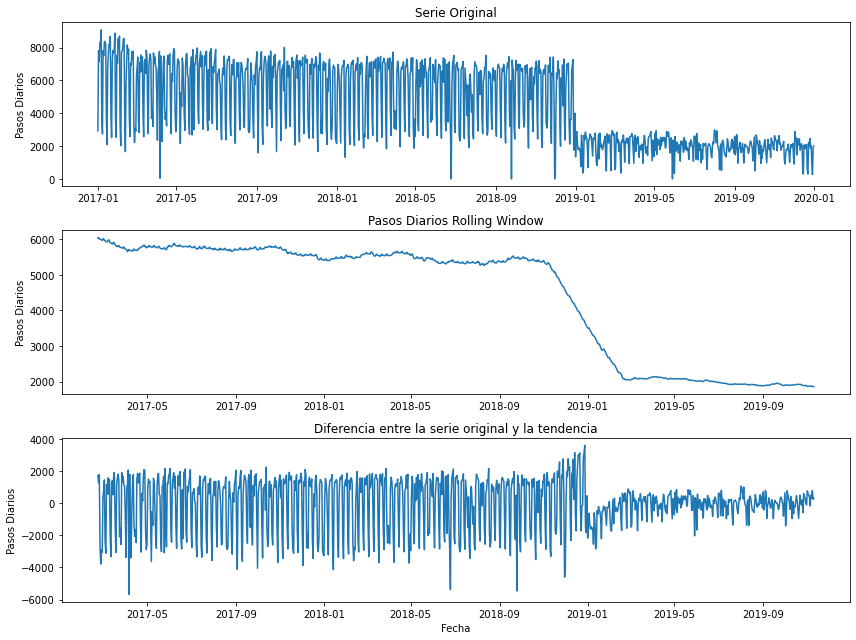

In [214]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('Pasos Diarios')

plt.subplot(3,1,2)
plt.title('Pasos Diarios Rolling Window')
plt.plot(diario_promedio_tendencia)
plt.ylabel('Pasos Diarios')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos - diario_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Pasos Diarios')

plt.tight_layout()
plt.show()

#### Procedo a descomponer la Serie de Tiempo con statmodels. 

In [215]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='additive')

#### Componente Tendencial

In [216]:
result.trend

fecha
2017-01-01            NaN
2017-01-02            NaN
2017-01-03            NaN
2017-01-04    6771.571429
2017-01-05    6744.714286
                 ...     
2019-12-27    1642.142857
2019-12-28    1639.285714
2019-12-29            NaN
2019-12-30            NaN
2019-12-31            NaN
Freq: D, Name: trend, Length: 1095, dtype: float64

#### Componente Estacional

In [217]:
result.seasonal

fecha
2017-01-01   -2225.267384
2017-01-02     302.573169
2017-01-03     649.122478
2017-01-04     948.627824
2017-01-05     781.141561
                 ...     
2019-12-27     906.106762
2019-12-28   -1362.304410
2019-12-29   -2225.267384
2019-12-30     302.573169
2019-12-31     649.122478
Freq: D, Name: seasonal, Length: 1095, dtype: float64

#### Gráficos desagregados de Pasos Vehículares según Serie Original, Tendencia, Estacionalidad y Ruido(resíduo).

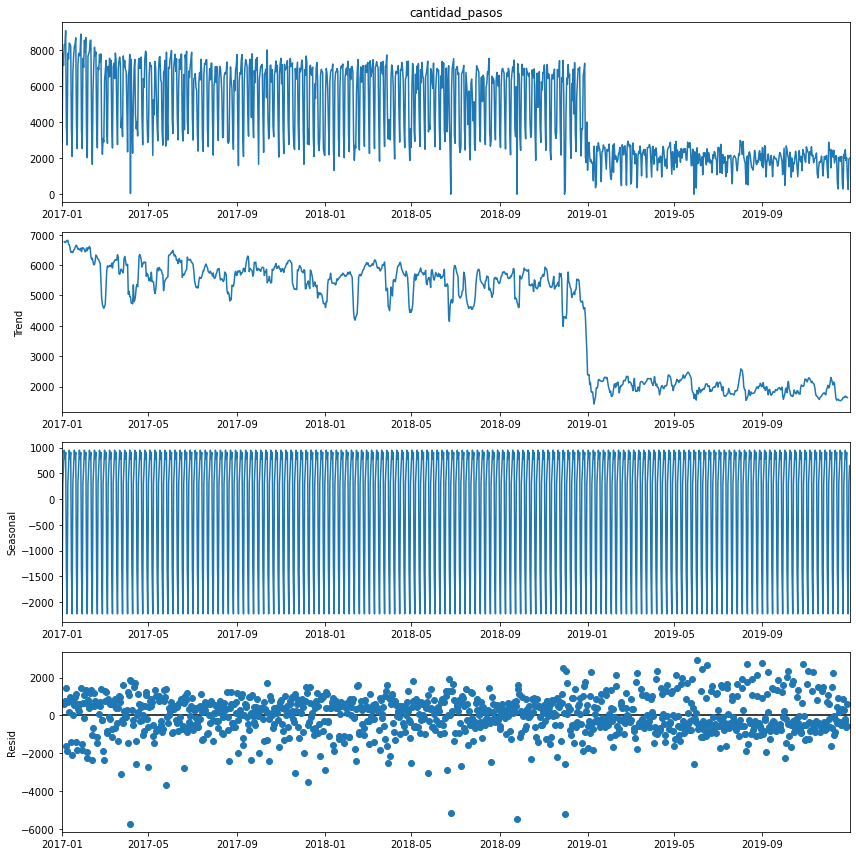

In [218]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

#### Histograma del Ruido - Residuo

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


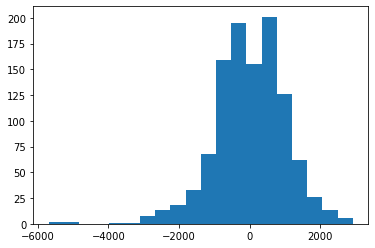

In [219]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.show()

#### Implemento Autocorrelación con statsmodels.

In [220]:
from statsmodels.tsa.stattools import acf
nlags =  52
autocorr = acf(diario.cantidad_pasos, nlags = nlags)

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [221]:
autocorr.shape

(53,)

#### Grafíco la Autocorrelación.

Text(0.5, 0, 'lag')

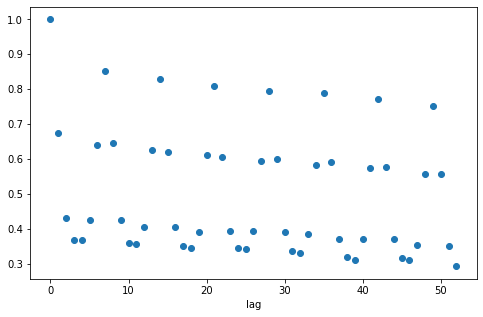

In [222]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

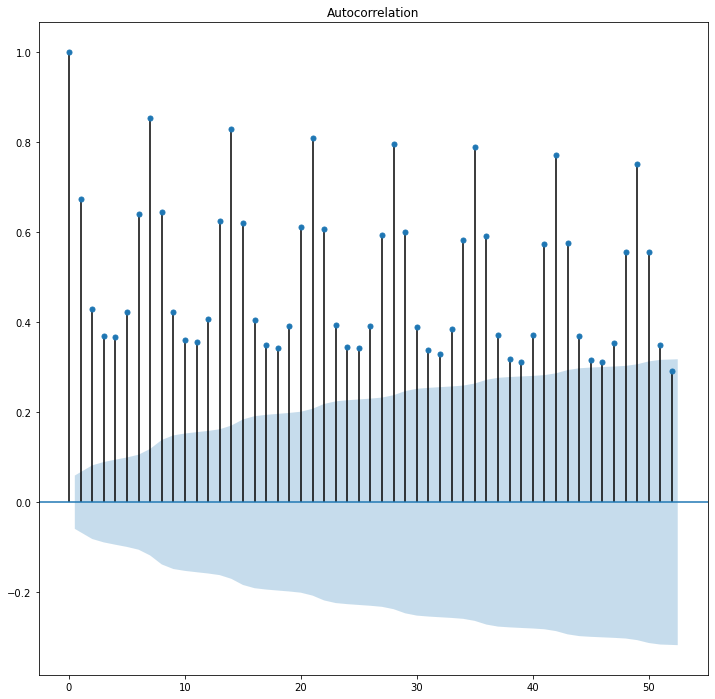

In [223]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario.cantidad_pasos, lags = nlags)
plt.show()

### Predicción a Futuro con One-Step Prediction

In [224]:
senial = diario.cantidad_pasos
senial.head()

fecha
2017-01-01    2925
2017-01-02    7819
2017-01-03    7151
2017-01-04    8303
2017-01-05    8314
Freq: D, Name: cantidad_pasos, dtype: int64

In [225]:
senial.shape

(1095,)

#### Defino cuántos valores *hacia atrás* tomaré (52 semanas).

In [226]:
look_back = 52 # uso 1 anios de datos para predecir el valor siguiente

In [227]:
N = senial.shape[0]
N 

1095

In [228]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1042, 52) (1042,)


#### Defino `X` e `y`

In [229]:
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

#### Imprimo `X` e `y

In [230]:
print(X)

[[2925. 7819. 7151. ... 2574. 7047. 6918.]
 [7819. 7151. 8303. ... 7047. 6918. 7761.]
 [7151. 8303. 8314. ... 6918. 7761. 7326.]
 ...
 [2367. 2211. 2640. ... 2470. 1865. 2016.]
 [2211. 2640. 2105. ... 1865. 2016.  904.]
 [2640. 2105. 2164. ... 2016.  904.  264.]]


In [231]:
print(y)

[7761. 7326. 7791. ...  904.  264. 1956.]


#### Realizo train/test split. 

In [232]:
N_train = 3*52 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 52 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(104, 52) (104,)
(52, 52) (52,)


#### Implemento Random Forest Regressor

In [233]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [234]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

#### Grafíco la importancia de cada feature.

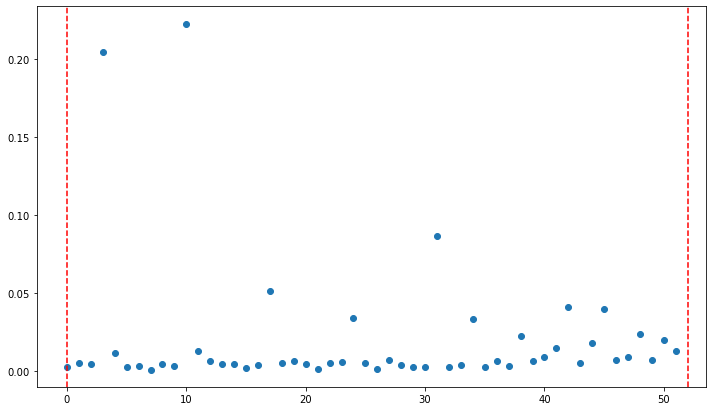

In [235]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(2)*52:
     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

#### Predigo con Random Forest Regressor.

In [236]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#### Grafíco.

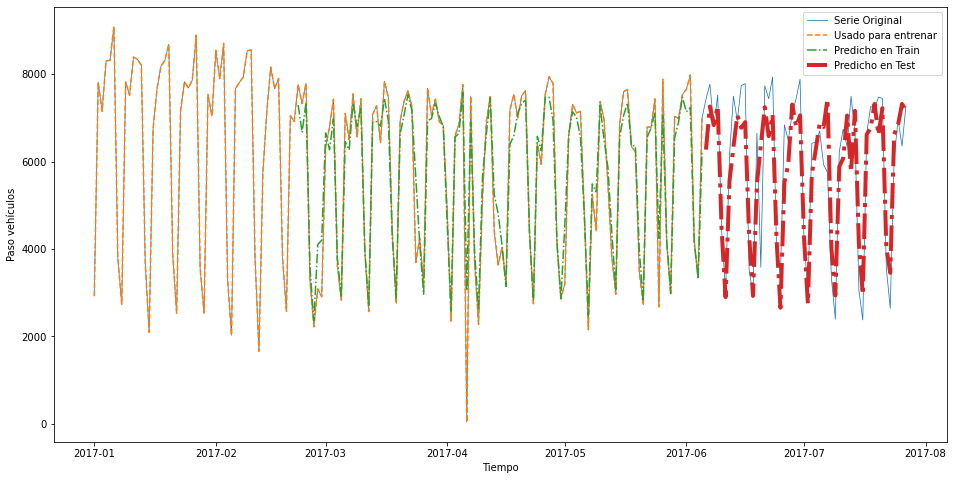

In [237]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Paso vehículos')
plt.show()

#### Calcúlo el Error en Train y en Test. Utilizo RMSE cómo métrica.

In [238]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 578.3156251422348
Error en Test: 810.6697861182444


### Modelo Benchmark - Predicción basada en copiar el valor de la fecha anterior.

In [239]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

#### Grafíco Serie Original y Predicción del Modelo Benchmark 

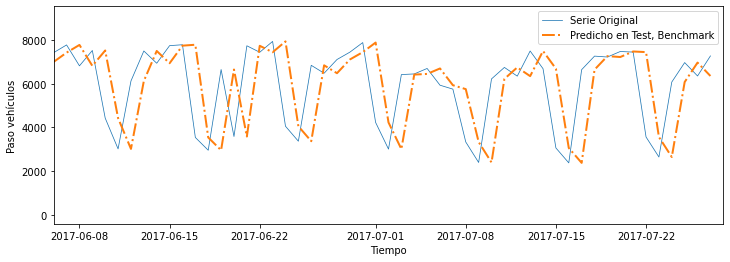

In [240]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Paso vehículos')
plt.legend()
plt.show()

#### Calcúlo el Error en Train y en Test del Modelo Benchmark. Utilizo RMSE cómo métrica.

In [241]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

2085.589526507295


#### El modelo Elegido(Random Forest Regressor) obtiene un mejor desempeño que el Modelo de Benchmark; considerando RMSE en Test.

#### Implemento Multi-Step Prediction.

In [242]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

#### Grafico desagregado de la Serie Original, de los Datos usados para Train; Predicho en Train y Predicho en Test con Multi-Step Prediction.

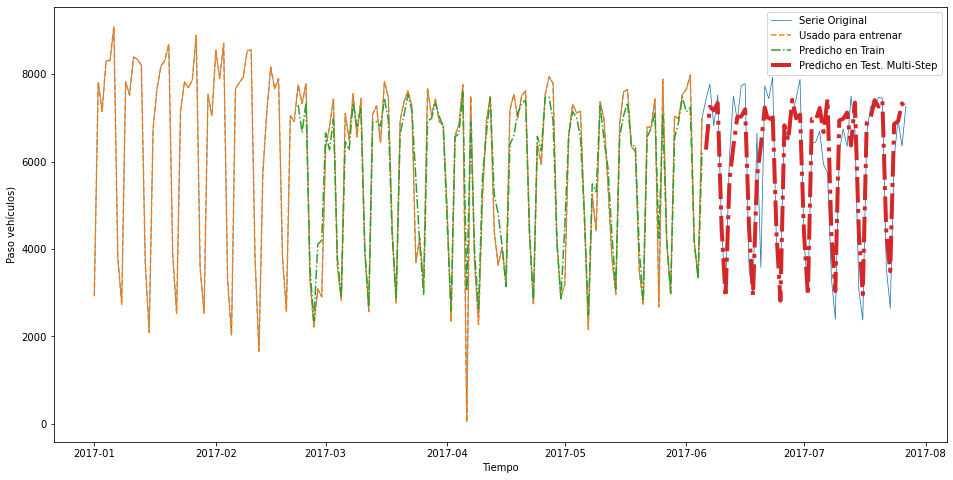

In [243]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Paso vehículos)')
plt.show()

#### Calcúlo el Error en Train y en Test con Multi-Step Predictión. Utilizo RMSE cómo métrica.

In [244]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Test: 761.8999090078393


### Conclusión: el mejor modelo por su desempeño en Test es Multi-Step Predictión.

**Modelo Benchmark, error en Test:**2085.58.

**Random Forest Regressor, error en Test:**810.66.

**Multi-Step Predictión, error en Test:**761.89.

### Segunda Parte. 

**Desarrollo Opcional del Proyecto. Agrego datos desde el año 2010 al análisis.** 

A continuación efectúo un preprocesamiento de los datasets de los años 2010 a 2015 ya  que la estructura de datos de los mismos, difiere de la estructura de datos de los años 2016 a 2019.

In [245]:
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')
data_2015 = pd.read_csv('flujo-vehicular-2015.csv', sep =',')
data_2014 = pd.read_csv('flujo-vehicular-2014.csv', sep =',')
data_2013 = pd.read_csv('flujo-vehicular-2013.csv', sep =',')
data_2012 = pd.read_csv('flujo-vehicular-2012.csv', sep =',')
data_2011 = pd.read_csv('flujo-vehicular-2011.csv', sep =',')
data_2010 = pd.read_csv('flujo-vehicular-2010.csv', sep =',')

El dataset del año 2016 posee las mismas columnas que 2019,2018,2017; por lo tanto lo agrego directamente.

In [246]:
op1 = pd.concat([data_2019, data_2018, data_2017,data_2016])

#Selecciono la estación Illia y la forma de pago Efectivo
mask = np.logical_and(op1.estacion=='Illia', op1.forma_pago == 'EFECTIVO')
op1 = op1[mask]

#Elimino las columnas que no voy a utilizar
op1.drop(columns = ['periodo','hora_inicio','estacion', 'sentido'], inplace = True)

op1.head()

,fecha,hora_fin,dia,tipo_vehiculo,forma_pago,cantidad_pasos
80,2019-01-01,2,Martes,Liviano,EFECTIVO,537
86,2019-01-01,2,Martes,Pesado,EFECTIVO,1
88,2019-01-01,2,Martes,Liviano,EFECTIVO,443
94,2019-01-01,2,Martes,Pesado,EFECTIVO,1
149,2019-01-01,3,Martes,Liviano,EFECTIVO,769


#### Corrijo la forma en que están escritos los días en el dataset de 2016 a 2019, con la finalidad que coincidan con el dataset de datos de 2010 a 2015 

In [247]:
op1.replace({"Miércoles": 'Miercoles', "Sábado": 'Sabado'},inplace=True)

#### Concateno los datos 2015 - 2010 ya que poseen las mismas features.

In [248]:
op2 = pd.concat([data_2015, data_2014, data_2013,data_2012, data_2011, data_2010])

#Selecciono la estación Illia y la forma de pago Efectivo
mask = np.logical_and(op2.estacion=='Illia', op2.forma_pago == 'EFECTIVO')
op2 = op2[mask]

#Elimino las columnas que no voy a utilizar
op2.drop(columns = ['periodo','estacion'], inplace = True)

op2.head()

,fecha,hora,dia,tipo_vehiculo,forma_pago,cantidad_pasos
998,2015-01-01,0.0,Jueves,Liviano,EFECTIVO,3.0
1000,2015-01-01,0.0,Jueves,Liviano,EFECTIVO,71.0
1004,2015-01-01,0.0,Jueves,Pesado,EFECTIVO,1.0
1007,2015-01-01,1.0,Jueves,Liviano,EFECTIVO,23.0
1010,2015-01-01,1.0,Jueves,Liviano,EFECTIVO,926.0


In [249]:
#Corrijo el nombre de hora a hora_fin para que coincidan las estructuras de datos
op2.rename(columns = {'hora':'hora_fin'}, inplace = True) 

#### Habiendo hecho coincidir las estructuras de datos de todos los años, procedo a concatenar los datasets de 2010 a 2019.  

In [250]:
op3= pd.concat([op1, op2])

In [251]:
op3.shape

(705782, 6)

In [252]:
op3.head()

,fecha,hora_fin,dia,tipo_vehiculo,forma_pago,cantidad_pasos
80,2019-01-01,2.0,Martes,Liviano,EFECTIVO,537.0
86,2019-01-01,2.0,Martes,Pesado,EFECTIVO,1.0
88,2019-01-01,2.0,Martes,Liviano,EFECTIVO,443.0
94,2019-01-01,2.0,Martes,Pesado,EFECTIVO,1.0
149,2019-01-01,3.0,Martes,Liviano,EFECTIVO,769.0


In [253]:
op3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 705782 entries, 80 to 618666
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fecha           705782 non-null  object 
 1   hora_fin        705782 non-null  float64
 2   dia             705782 non-null  object 
 3   tipo_vehiculo   705782 non-null  object 
 4   forma_pago      705782 non-null  object 
 5   cantidad_pasos  705782 non-null  float64
dtypes: float64(2), object(4)
memory usage: 37.7+ MB


In [254]:
op3.describe()

,hora_fin,cantidad_pasos
count,705782.000000,705782.000000
mean,11.849910,248.804834
std,6.746745,622.512120
min,0.000000,1.000000
25%,6.000000,3.000000
50%,12.000000,13.000000
75%,18.000000,90.000000
max,23.000000,4685.000000


**Elimino Outliers con IQR**

In [255]:
Q1 = op3.quantile(0.25)
Q3 = op3.quantile(0.75)
IQR = Q3 - Q1

In [256]:
dfout1=op3[~((op3< (Q1 - 1.5 * IQR)) |(op3 > (Q3 + 1.5 * IQR))).any(axis=1)]
dfout1.shape

(579227, 6)

In [257]:
dfout1.head()

,fecha,hora_fin,dia,tipo_vehiculo,forma_pago,cantidad_pasos
86,2019-01-01,2.0,Martes,Pesado,EFECTIVO,1.0
94,2019-01-01,2.0,Martes,Pesado,EFECTIVO,1.0
155,2019-01-01,3.0,Martes,Pesado,EFECTIVO,7.0
164,2019-01-01,3.0,Martes,Pesado,EFECTIVO,7.0
291,2019-01-01,5.0,Martes,Pesado,EFECTIVO,1.0


**Transformo la columna fecha a formato datetime y agrego hora_fin como hora.**

In [258]:
dfout1['fecha2'] = pd.to_datetime(dfout1.fecha) + pd.to_timedelta(dfout1.hora_fin, unit = 'h')

#Quito las columnas fecha y hora_fin ya que las incluí en el campo fecha2
dfout1.drop(columns=['fecha','hora_fin'], inplace = True)

dfout1.head()

<ipython-input-258-496ea8aab7b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfout1['fecha2'] = pd.to_datetime(dfout1.fecha) + pd.to_timedelta(dfout1.hora_fin, unit = 'h')
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,dia,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
86,Martes,Pesado,EFECTIVO,1.0,2019-01-01 02:00:00
94,Martes,Pesado,EFECTIVO,1.0,2019-01-01 02:00:00
155,Martes,Pesado,EFECTIVO,7.0,2019-01-01 03:00:00
164,Martes,Pesado,EFECTIVO,7.0,2019-01-01 03:00:00
291,Martes,Pesado,EFECTIVO,1.0,2019-01-01 05:00:00


In [259]:
#Corrijo el nombre de fecha2 a fecha
dfout1.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dfout1.head()

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,dia,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
86,Martes,Pesado,EFECTIVO,1.0,2019-01-01 02:00:00
94,Martes,Pesado,EFECTIVO,1.0,2019-01-01 02:00:00
155,Martes,Pesado,EFECTIVO,7.0,2019-01-01 03:00:00
164,Martes,Pesado,EFECTIVO,7.0,2019-01-01 03:00:00
291,Martes,Pesado,EFECTIVO,1.0,2019-01-01 05:00:00


In [260]:
#Reordeno el dataset por fecha e imprimo las primeras instancias
dfout1.sort_values('fecha', inplace = True)
dfout1.reset_index(drop=True, inplace = True)
dfout1

<ipython-input-260-259f22bb1108>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfout1.sort_values('fecha', inplace = True)


,dia,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Viernes,Liviano,EFECTIVO,189.0,2010-01-01 00:00:00
1,Viernes,Liviano,EFECTIVO,3.0,2010-01-01 00:00:00
2,Viernes,Pesado,EFECTIVO,1.0,2010-01-01 00:00:00
3,Viernes,Pesado,EFECTIVO,8.0,2010-01-01 01:00:00
4,Viernes,Liviano,EFECTIVO,13.0,2010-01-01 01:00:00
...,...,...,...,...,...
579222,Martes,Pesado,EFECTIVO,2.0,2019-12-31 21:00:00
579223,Martes,Pesado,EFECTIVO,1.0,2019-12-31 22:00:00
579224,Martes,Pesado,EFECTIVO,2.0,2019-12-31 22:00:00
579225,Martes,Liviano,EFECTIVO,214.0,2019-12-31 23:00:00


### Encoding

#### Transformo variables categóricas de 'dia' y 'tipo_vehiculo'  y 'forma_pago' a númericas, con el fin de incluirlas en mi análisis.

In [261]:
from sklearn.preprocessing import OneHotEncoder

In [262]:
dia_get=pd.get_dummies(dfout1['dia'])

In [263]:
vehiculo_get=pd.get_dummies(dfout1['tipo_vehiculo'])

In [264]:
pago_get=pd.get_dummies(dfout1['forma_pago'])

#### Defino un nuevo dataset, con las variables encodeadas.

In [265]:
data1=pd.concat([dfout1, dia_get,vehiculo_get,pago_get ], axis=1)

#### Elimino las columnas categóricas encodeadas.

In [266]:
columnas_descartables = ['dia','tipo_vehiculo','forma_pago' ]

In [267]:
data1 = data1.drop(columns=columnas_descartables)

#### Reseteo el index del dataset.

In [268]:
data1 = data1.reset_index(drop=True)

In [269]:
data1.shape

(579227, 12)

#### Imprimo las primeras instancias del nuevo dataset. 

In [270]:
data1.head()

,cantidad_pasos,fecha,Domingo,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes,Liviano,Pesado,EFECTIVO
0,189.0,2010-01-01 00:00:00,0,0,0,0,0,0,1,1,0,1
1,3.0,2010-01-01 00:00:00,0,0,0,0,0,0,1,1,0,1
2,1.0,2010-01-01 00:00:00,0,0,0,0,0,0,1,0,1,1
3,8.0,2010-01-01 01:00:00,0,0,0,0,0,0,1,0,1,1
4,13.0,2010-01-01 01:00:00,0,0,0,0,0,0,1,1,0,1


#### Resampleo a Días para visualizar mejor los datos

In [271]:
diario2 = data1.resample('D', on = 'fecha').sum()
print(diario2.shape)

(3652, 11)


#### Interpolo los datos e imprimo valores nulos. 

In [272]:
diario2 = diario2.interpolate()
print(diario2.isna().sum())

cantidad_pasos    0
Domingo           0
Jueves            0
Lunes             0
Martes            0
Miercoles         0
Sabado            0
Viernes           0
Liviano           0
Pesado            0
EFECTIVO          0
dtype: int64


#### Componentes de la serie.

Implemento Ventanas Móviles (rolling windows)

In [273]:
ventana = int(365*5/7)
diario_promedio_tendencia = diario2.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia

fecha
2010-01-01   NaN
2010-01-02   NaN
2010-01-03   NaN
2010-01-04   NaN
2010-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 3652, dtype: float64

#### Grafíco Cantidad Promedio de Pasos y Pasos Promedio Mediante Ventanas Móviles. 

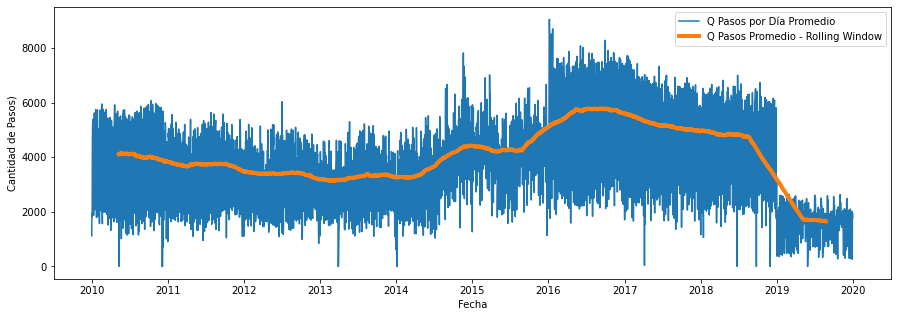

In [274]:
plt.figure(figsize = (15,5))
plt.plot(diario2.index, diario2.cantidad_pasos, label = 'Q Pasos por Día Promedio')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Q Pasos Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos)')
plt.legend()
plt.show()

**Realizo una Tendencia Lineal - LinearRegression**

In [275]:
diario2['fecha_numeros']=diario2.index.map(datetime.datetime.toordinal)

In [276]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario2.fecha_numeros.values.reshape(-1, 1), diario2.cantidad_pasos)

LinearRegression()

**Grafíco Pasos Promedio Diario, Pasos Diarios Promedios por Ventanas Móviles y Pasos Diarios Promedios por Ajuste Lineal.**

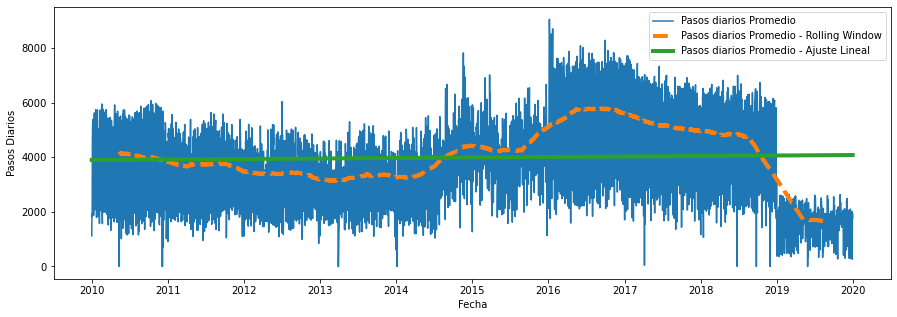

In [277]:
plt.figure(figsize = (15,5))
plt.plot(diario2.index, diario2.cantidad_pasos, label = 'Pasos diarios Promedio')
plt.plot(diario_promedio_tendencia, ls = '--', lw = 4, label = 'Pasos diarios Promedio - Rolling Window')
plt.plot(diario2.index, lr.predict(diario2.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Pasos diarios Promedio - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Pasos Diarios')
plt.legend()
plt.show()

**Se evidencia una tendencia a la disminución del flujo vehícular con el paso del tiempo.**

**Gráficos desagregados de Pasos Vehículares según Serie Original, Ventanas Móviles y la Diferencia entre ambas**

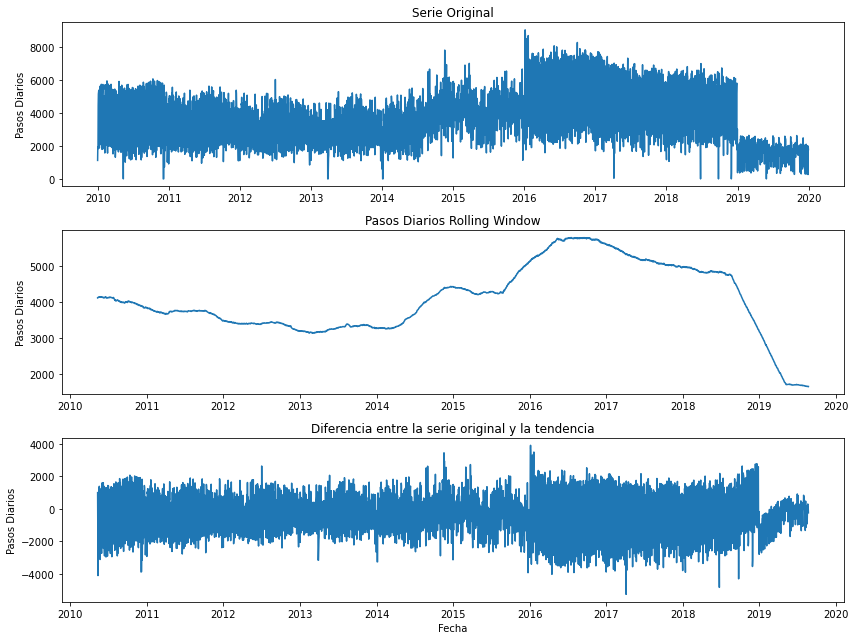

In [278]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario2.index, diario2.cantidad_pasos)
plt.ylabel('Pasos Diarios')

plt.subplot(3,1,2)
plt.title('Pasos Diarios Rolling Window')
plt.plot(diario_promedio_tendencia)
plt.ylabel('Pasos Diarios')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario2.index, diario2.cantidad_pasos - diario_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Pasos Diarios')

plt.tight_layout()
plt.show()

**Procedo a descomponer la Serie de Tiempo con statmodels.**

In [279]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario2.cantidad_pasos, model='additive')

**Componente Tendencial**

In [280]:
result.trend

fecha
2010-01-01            NaN
2010-01-02            NaN
2010-01-03            NaN
2010-01-04    3595.142857
2010-01-05    4107.571429
                 ...     
2019-12-27    1467.571429
2019-12-28    1501.714286
2019-12-29            NaN
2019-12-30            NaN
2019-12-31            NaN
Freq: D, Name: trend, Length: 3652, dtype: float64

**Componente Estacional**

In [281]:
result.seasonal

fecha
2010-01-01     661.325058
2010-01-02   -1214.005625
2010-01-03   -2074.840670
2010-01-04     361.642854
2010-01-05     693.858099
                 ...     
2019-12-27     661.325058
2019-12-28   -1214.005625
2019-12-29   -2074.840670
2019-12-30     361.642854
2019-12-31     693.858099
Freq: D, Name: seasonal, Length: 3652, dtype: float64

**Gráficos desagregados de Pasos Vehículares según Serie Original, Tendencia, Estacionalidad y Ruido(resíduo).**

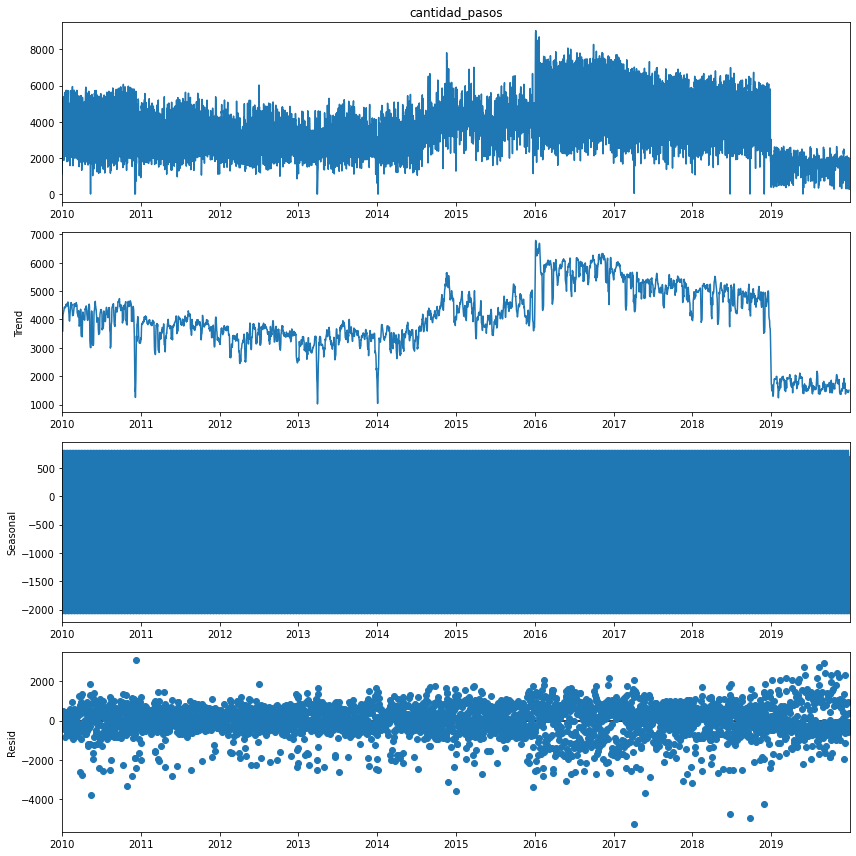

In [282]:
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

**Histograma del Ruido - Residuo**

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


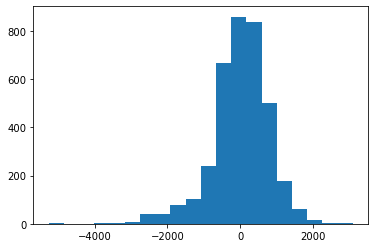

In [283]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.show()

**Implemento Autocorrelación con statsmodels.**

In [284]:
from statsmodels.tsa.stattools import acf
nlags =  260
autocorr = acf(diario2.cantidad_pasos, nlags = nlags)

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [285]:
autocorr.shape

(261,)

**Grafíco la Autocorrelación.**

Text(0.5, 0, 'lag')

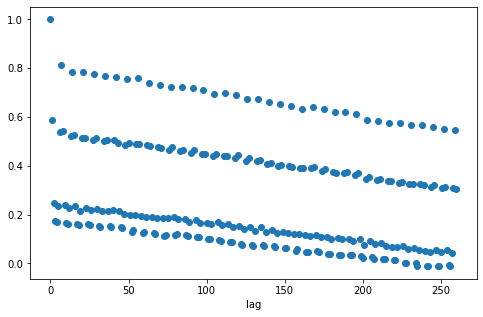

In [286]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

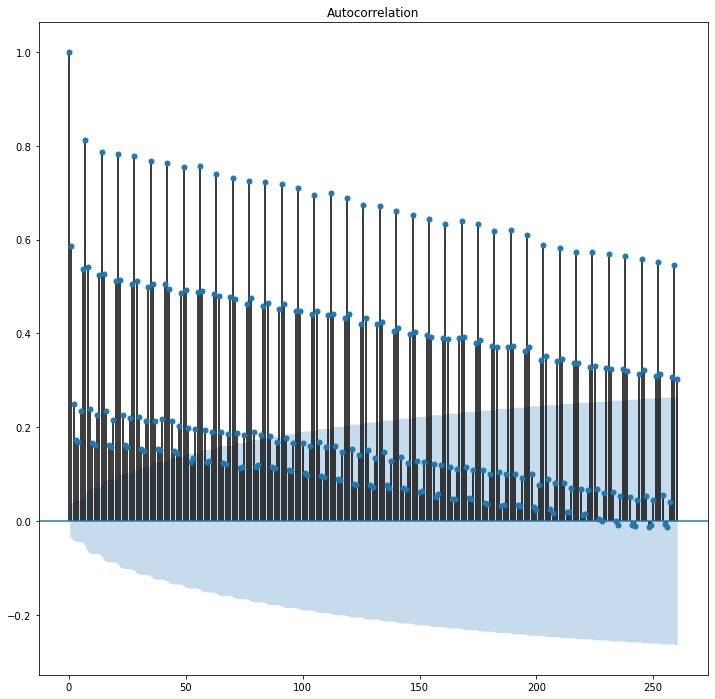

In [287]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario2.cantidad_pasos, lags = nlags)
plt.show()

**Predicción a Futuro con One-Step Prediction***

In [288]:
senial = diario2.cantidad_pasos
senial.head()

fecha
2010-01-01    1121.0
2010-01-02    1933.0
2010-01-03    1829.0
2010-01-04    4464.0
2010-01-05    5155.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [289]:
senial.shape

(3652,)

**Defino cuántos valores *hacia atrás* tomaré (104 semanas).**

In [290]:
look_back = 104 # uso 2 anios de datos para predecir el valor siguiente

In [291]:
N = senial.shape[0]
N 

3652

In [292]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(3547, 104) (3547,)


**Defino `X` e `y`**

In [293]:
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

**Imprimo `X` e y**

In [294]:
print(X)

[[1121. 1933. 1829. ... 5054. 4647. 4232.]
 [1933. 1829. 4464. ... 4647. 4232. 5116.]
 [1829. 4464. 5155. ... 4232. 5116. 4662.]
 ...
 [ 971. 1826. 1866. ... 1979. 1865. 2016.]
 [1826. 1866. 2025. ... 1865. 2016.  656.]
 [1866. 2025. 1717. ... 2016.  656.  264.]]


In [295]:
print(y)

[5116. 4662. 2472. ...  656.  264. 1956.]


**Realizo train/test split.** 

In [296]:
N_train = 8*52 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 2*52 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(312, 104) (312,)
(104, 104) (104,)


**Implemento Random Forest Regressor**

In [297]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [298]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

**Grafíco la importancia de cada feature.**

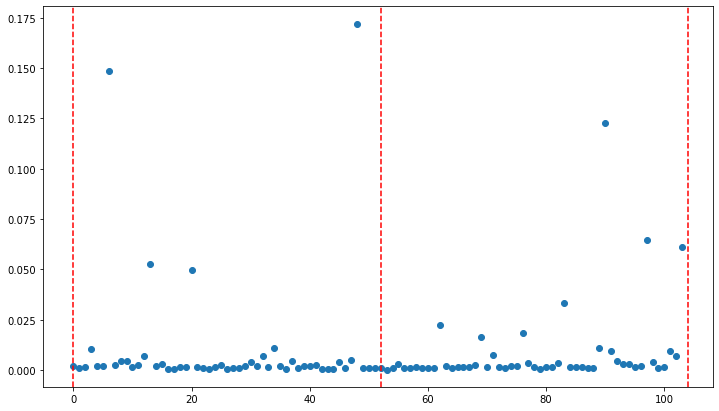

In [299]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(3)*52:
     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

**Predigo con Random Forest Regressor.**

In [300]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

**Grafíco.**

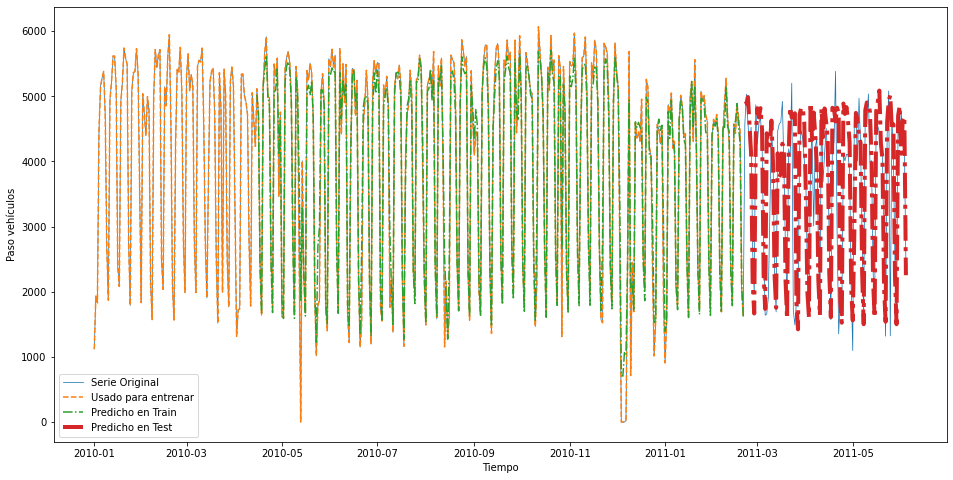

In [301]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Paso vehículos')
plt.show()

**Calcúlo el Error en Train y en Test. Utilizo RMSE cómo métrica.**

In [302]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 341.5844495997049
Error en Test: 903.4344734704381


**Modelo Benchmark - Predicción basada en copiar el valor de la fecha anterior.**

In [303]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

**Grafíco Serie Original y Predicción del Modelo Benchmark**

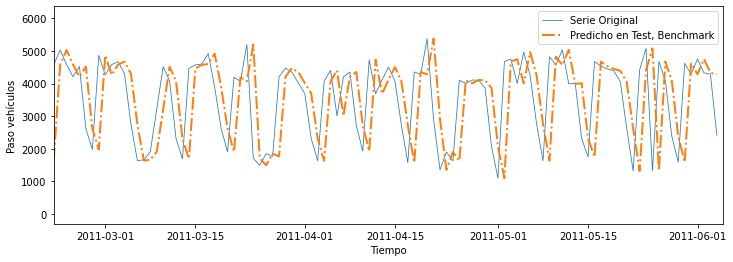

In [304]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Paso vehículos')
plt.legend()
plt.show()

**Calcúlo el Error en Train y en Test del Modelo Benchmark. Utilizo RMSE cómo métrica.**

In [305]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

1466.2837575627398


**El modelo Elegido(Random Forest Regressor) obtiene un mejor desempeño que el Modelo de Benchmark; considerando RMSE en Test.**

**Implemento Multi-Step Prediction.**

In [306]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

**Grafico desagregado de la Serie Original, de los Datos usados para Train; Predicho en Train y Predicho en Test con Multi-Step Prediction.**

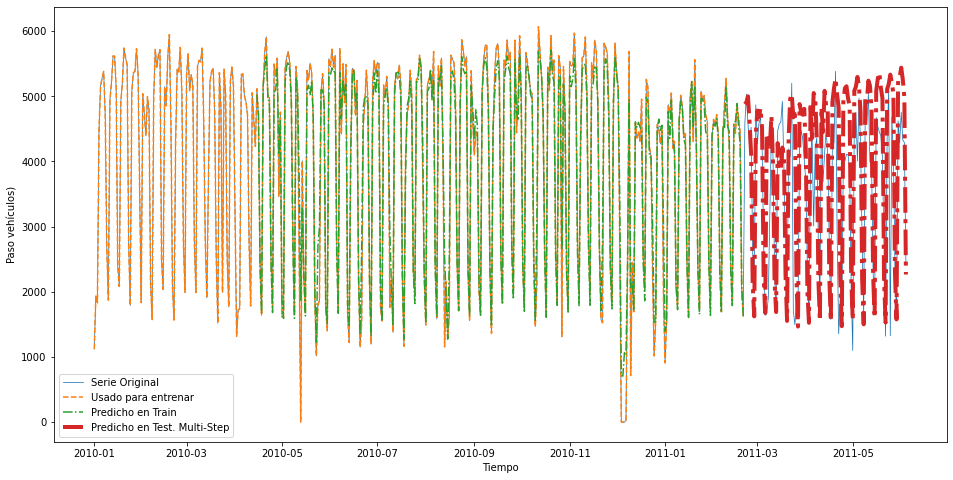

In [307]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Paso vehículos)')
plt.show()

**Calcúlo el Error en Train y en Test con Multi-Step Predictión. Utilizo RMSE cómo métrica.**

In [308]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Train:',np.sqrt(MSE))

Error en Train: 982.8738985485762


### Tercera Parte. Interpretación e información adicional. 

**Análisis Exploratoriro de Datos y Modelos de Machine Learning Implementados**

Con el agregado de los datos relativos a los años 2010 - 2016 no mejora el desempeño del modelo.**

Los modelos implementados, han demostrado un desigual desempeño; resultando el más preciso Multi -Step Prediction

**Información adicional sobre la Autopista Arturo Illía**

*Obras de infraestructura (constructiva/edilicia): 

La dismunición del transito vehicular en la Autopista Illía, responde a un plan de obras generales iniciado por la empresa AUSA S.A. Este plan de obras explica el cambio en la dinámica del flujo vehícular desde el año 2019.

Las obras ejecutadas y en ejecución, son de gran envergadura, tal el desarrollo de la Autopista Paseo del Bajo, obra que ha tenido un gran impacto en el sistema de autopistas en general.

Al presente la empresa AUSA S.A. aún se encuentra en obras para la readecuación definitiva de la Autopista Arturo Illía.

El mayor impacto se ha manifestado en la disminución en general del flujo vehícular, de manera más acentuada en el tránsito pesado.

*Nuevas formas de Pago y políticas de precios:

En relación a las formas de pago, se han incorporado nuevas opciones, las que gradualmente van cobrando importancia, pero ninguna a cambiado radicalmente la distribución de la frecuencia del tipo de pago. Es decir la estructura de pago, por tipo de pago, al presente es constante.

Un punto a considerar, es que la Autopista Illía además de verse afectada por las obras en general y las nuevas modalidades de pago; también se ha convertido en la autopista con el precio de peaje más elevado de argentina.

**Breve reseña de la  Autopista Paseo del Bajo:** 

Un Corredor Vial Preferencial para Tránsito Pesado(camiones y acoplados cuyo peso en forma individual sea igual o mayor a 12 toneladas y Ómnibus de Transporte de Pasajeros de Larga Distancia, circulen con o sin carga), a distinto nivel, que permite segregar este tipo de vehículos del tránsito general.

Más información en el siguiente link:

https://www.fadeeac.org.ar/wp-content/uploads/2019/05/2019-05-15-Presentacion-PDB_Puerto-4_compressed-1.pdf



**Pasos a Seguir**

En el trabajo Integrador (Proyecto 4) profundizaré en la mejora de los modelos e implementaré otros, tales cómo Prophet y redes neuronales con Keras y Tensor Flow. 

Adicionalmente, he iniciado una búsqueda de dataset correspondientes a otras Autopistas (que se articulan con las de la empresa AUSA SA) explotadas por otras empresas; todo esto en vistas de incorporarlos a mi análisis y así comprender los cambios en el flujo vehicular de la Ciudad Autónoma de Buenos Aires y la provincia de Buenos Aires.  



**PARTE C - Resultados esperados**
Rehacer. Dar una idea de que resultados espera obtener luego de implementar la investigación propuesta.

Al haber evidenciado un cambio marcado en el flujo de tránsito pesado, en la Ciudad Autónoma de Buenos Aires y la provincia de Buenos Aires (dónde se concentran grandes empresas; principales puertos del país y puertos secos), resulta necesario entender que el mismo tiene un potenciál de gran impacto en los intercambios comerciales hacia el interior y exterior del país.

Tratándose de un país tan extenso  y centralizado económicamente cómo argentina, cualquier inconveniente (de cualquier índole) en la distribución de mercanciás produce desabastacimiento al resto de las provincias.

Es decir que cualquier cambio en el sistema de autopistas, no se circuncribe unicamente a un efecto sobre la calidad de vida de los habitantes de la Ciudad Autónoma de Buenos Aires, y la provincia de Buenos Aires. 

El potencial impacto es de índole Federal.

Por ese motivo, cómo expresé en el apartado "Pasos a Seguir"; agregaré a mi análisis nuevos datasets correspondientes al flujo vehícular de otras autopistas(que se articulan con las de la empresa AUSA SA) con la finalidad de comprender a mayor profundidad la modificación en la dinámica del tránsito evidenciado en años anteriores y a partir de ese conocimiento, procesar los nuevos datos y efectuar una mejor predicción sobre lo que pudiera suceder ante cambios de magnitud en el flujo vehícular en territorio de la Ciudad Autónoma de Buenos Aires, y la provincia de Buenos Aires y su potencial impacto a nivel país.

Para finalizar, reitero que implementaré otro conjunto de herramientas y modelos (Prophet y redes neuronales con Keras y Tensor Flow) para el análisis de estas nuevas Series de Tiempo; buscando obtener modelos de mejor desempeño predictivo. 


**ACCESO AL REPOSITORIO DE GITHUB:** https://github.com/sebastiansinghcaro/Acamica-Proyecto-3